## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [1]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Lundberg'  # string
student['Firstname']='Tomas' # string
student['CID']='lutomas'        # string
student['DOB-year']=1995         # four-digit integer
student['DOB-month']=12           # integer in the range [1, 12]
student['DOB-day']=17             # integer in the range [1, 31]


# 
# YOUR CODE HERE
# 

In [2]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 1
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 29-Aug-2020 by Christian Forssén [christian.forssen@chalmers.se]

## Problem 1
### (1 point)

#### Installations
Perform the installations and preparations that are described in the Getting Started instructions. At the end you should have:

1. downloaded the current version of the course material from the github repository or from the course web page;
2. a running python installation that includes the modules listed in the environment.yml file (e.g. numpy, matplotlib, pandas, emcee, scikit-learn, ...);
3. been able to open and run the Jupyter Notebooks with the first week excercises.
Ask the computer lab supervisors for assistance if needed.

In [3]:
# Module needed for grading tests
import sys

# Make sure that you are running python with version >= 3.x
#
# Import the following python modules with
# the specified abreviations:
# ---
# numpy as np
# scipy as scipy
# matplotlib.pyplot as plt
# pandas as pd
# sklearn as skl
# emcee as emcee


import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import emcee as emcee
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set('talk')

In [4]:
assert sys.version_info.major>=3, \
    'You are running Python version'+\
    f'{sys.version_info.major}.{sys.version_info.minor}'

modules = [('numpy','np'), ('scipy', 'scipy'), \
           ('matplotlib.pyplot', 'plt'), ('pandas', 'pd'), \
           ('sklearn', 'skl'), ('emcee', 'emcee')]
for (_module, _module_abbrev) in modules:
    assert _module in sys.modules and _module_abbrev in dir(),\
        f'Module {_module} not loaded properly.'

## Problem 2
### (3 points)

#### Generate data

In [5]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)
m = 100 # Number of data

# X are picked uniform random [0,2]
X = 2 * np.random.rand(m, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(m, 1)

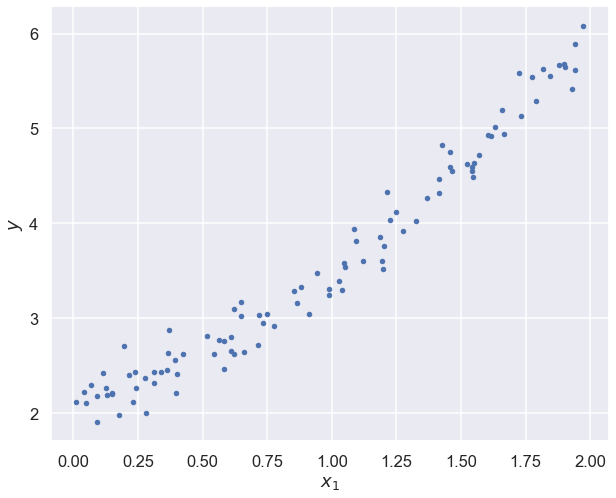

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X, y, "b.")
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$y$');

#### (a) Perform a linear regression using the Normal Equation
Create the design matrix for a quadratic polynomial and solve the normal equation using matrix inversion.

In [7]:
def design_matrix(X, degree=2):
    """
    Returns a design matrix.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        X_d: Design matrix of shape (m, order+1).
    """
    # number of instances
    m = len(X)
    
    # X_d = design matrix. construct it by its definition
    X_d = np.c_[np.ones((m,1))]
    for p in range(1,degree+1):
        X_d = np.c_[X_d, X**p]
    
    return X_d

In [8]:
assert design_matrix(X).shape == (len(X),3)
assert design_matrix(X)[:,0].all() == 1
assert design_matrix(X)[0,1] == X[0]
assert design_matrix(X)[0,2] == X[0]**2

In [9]:
def solve_normal_equation(X_d, y):
    """
    Solve the normal equation.
    
    Args:
        X_d: Design matrix of shape (m,n) with 'm' independent data
               and 'n' features.
        y: Dependent data of shape (m,1).
                  
    Returns:
        theta_best: Best parameters, array of shape (n,).
    """
    H = np.linalg.inv(X_d.T.dot(X_d)) # H defined as by the lecture notes
    theta_best = H.dot(X_d.T).dot(y) # Best theta given by the normal equation
    
    return theta_best.flatten()

In [10]:
assert (solve_normal_equation(design_matrix(X), y)).shape==(3,),\
    'Return object has wrong shape. Maybe the `flatten` method will be useful?'

#### (b) Comparisons: 
Compare the coefficients from the true data generator and the normal equation. Plot the data and the model predictions in the same figure.

y=x_0 + x_1*x + x_2*x^2
True coefficients 
 x_0=2.00
 x_1=1.00
 x_2=0.50
Model predictions 
 x_0=2.11
 x_1=0.73
 x_2=0.62


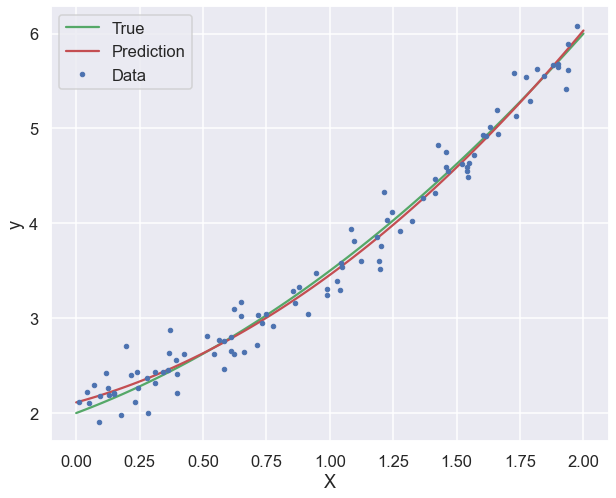

In [11]:
theta = solve_normal_equation(design_matrix(X), y) # Best theta from linear regression
theta_true = [2,1,0.5] # The true values of theta used to generate the data
print('y=x_0 + x_1*x + x_2*x^2') 
print(f'True coefficients \n x_0={theta_true[0]:.2f}\n x_1={theta_true[1]:.2f}\n x_2={theta_true[2]:.2f}')
print(f'Model predictions \n x_0={theta[0]:.2f}\n x_1={theta[1]:.2f}\n x_2={theta[2]:.2f}')

# plotting:
m = len(X)
minX=0 # data generated on x in [0,2]
maxX=2
X_lin = np.linspace(minX, maxX, m)
X_d_lin = design_matrix(X_lin, degree=2) # create design matrix with linearized spaced data used for plotting
y_true = X_d_lin.dot(theta_true) # True functino
y_pred = X_d_lin.dot(theta) # predicted function

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X_lin, y_true, "g-",label="True")
ax.plot(X_lin, y_pred, "r-",label="Prediction")
ax.plot(X, y, "b.",label="Data")
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc='best');

## Problem 3
### (3 points)

There are three files in the directory `DataFiles`:
- `dataset1.dat`
- `dataset2.dat`
- `dataset3.dat`

Each data files contains two columns. The first column corresponds to the independent variables (the array X), and the second column corresponds to the dependent ones (the array y).

In [12]:
# This cell is used in the solution notebook to generate the data. 
# It is hidden in the student version.
# 
# Please ignore the comment in this cell that says "YOUR CODE HERE". It gets added automatically.
# No solution code is needed here.
# ---
# 
# YOUR CODE HERE
# 

#### (a) Implement linear regression and cost function
- Load a data set and split it into 60% training and 40% validation data using the python function below.
- Implement a linear regression function that takes training data as input and returns a best-fit parameter vector for a polynomial model of a specified degree.
- Implement a cost function that takes data and model parameters as input and returns the mean-squared error.

In [13]:
# built-in convenience function for splitting data
from sklearn.model_selection import train_test_split

def load_data(datafile, train_size=0.6):
    """
    Reads data from file and returns training and validation sets.
    
    Args:
        datafile: String with data filename path. The data file 
            should contain two columns: x, y
        train_size: float indicating the fraction of training data
            (default: 0.6)
            
    Returns:
        (X_train, X_val, y_train, y_val): Tuple with four arrays 
            with training and validation data.
    """
    X, y = np.loadtxt(datafile, unpack=True)
    m = len(X)
    X = X.reshape(m,1); y = y.reshape(m,1)

    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, train_size=train_size, random_state=42)
    return (X_train, X_val, y_train, y_val)

In [14]:
# Implement a linear regression function that takes 
# training data as input and returns a best-fit parameter 
# vector for a polynomial model of a specified degree.
def linear_regression(X, y, degree=2):
    """
    Performs linear regression for a polynomial model.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        theta_fit: Best fit parameters. Array of shape (degree+1,)
    """
    return solve_normal_equation(design_matrix(X, degree=degree), y) #Use functions from previous excercise

In [15]:
datafile = 'DataFiles/dataset1.dat'
(X_train, X_val, y_train, y_val) = load_data(datafile)
assert len(linear_regression(X_train, y_train, degree=3))==4
a0_degree3fit_residual = \
    linear_regression(X_train, y_train, degree=3)[0] - 0.041779
assert abs(a0_degree3fit_residual) < 1e-7


In [16]:
# Implement a cost function that takes data and polynomial model 
# parameters as input and returns the mean-squared error.

def mean_squared_error(X, y, theta):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        y: Array of shape (m,1) with 'm' dependent data.
        theta: Parameter array [shape (degree+1,)]. 
            The ordering corresponds to the constant term first.
            
    Return:
        MSE: Mean-squared error defined as
            MSE = (1/m) * sum_i (y[i] - y_model[i])**2,
            where y_model[i] = \sum_m theta[m]*X[i]**m 
    """
    m = len(X) #length of data
    degree = len(theta)-1 #degree of polynomial
    X_d_pred = design_matrix(X, degree=degree) #create design matrix
    y_pred = X_d_pred.dot(theta).reshape(m, 1) # our predictions from fitted model
    MSE = 1/m*sum((y-y_pred)**2)[0] # the mean squared error as defined by the lecture notes
    return MSE

In [17]:
# Implement a function that takes data and polynomial model degree
# and returns the mean-squared error for both training and validation data
# as well as the best fit parameters.
def polynomial_regression(data, degree):
    """
    Compute the mean-squared error for data and a polynomial fit.
    
    Args:
        data = (X_train, X_val, y_train, y_val): Tuple with four arrays 
            with training and validation data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
            
    Return:
        MSE_train: Mean-squared error of training data
        MSE_val: Mean-squared error of validation data
        theta_fit: Best fit parameters [array of shape (degree+1,)]
    """
    theta = linear_regression(data[0], data[2], degree=degree) #obtain theta from linear regression with traing data
    MSE_train = mean_squared_error(data[0], data[2], theta) # MSE on the training data
    MSE_val = mean_squared_error(data[1], data[3], theta) #MSE on the validation data
    return MSE_train, MSE_val, theta

In [18]:
X_train=np.array([[1],[2],[3]])
y_train=np.array([[2],[5],[10]])
assert mean_squared_error(X_train, y_train, np.array([1,0,1]))==0
assert mean_squared_error(X_train, y_train, np.array([0,0,0]))==43

X_val = np.array([[4],[5]])
y_val = np.array([[17],[27]])
MSE_train, MSE_val, theta_fit = \
    polynomial_regression( (X_train, X_val, y_train, y_val), 2)
assert MSE_val-0.5 < 1e-7


#### (b) Perform linear regression with different polynomial models
- For each data set you should then perform linear regression using polynomial models of order 1,2,3,4,5, and 20.
- Finally, print the fit coefficients for each polynomial model that was considered and print also the mean-squared error (MSE) for both the training and the validation sets.

In [19]:
def plot_fit(X, y, ax, theta):
    """
    Plots the regression fit on axis ax given data X and y and best fit parameters theta.
    
    """
    degree = len(theta)-1 #degree of polynomial
    minX=min(X) 
    maxX=max(X)
    X_lin = np.linspace(minX, maxX, 100)
    X_d_lin = design_matrix(X_lin, degree=degree) #create linearliy spaced design matrix for plotting
    y_pred = X_d_lin.dot(theta) #predictions on linear input values 

    ax.plot(X_lin, y_pred, label=f"order {degree}")
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    

Data set 1
	Order 1:
		MSE_train = 58.062,
		MSE_val = 39.879,
		Coefficients = [ 8.64 -1.23]
	Order 2:
		MSE_train = 4.412,
		MSE_val = 4.118,
		Coefficients = [ 0.13 -0.64  2.59]
	Order 3:
		MSE_train = 2.326,
		MSE_val = 2.544,
		Coefficients = [ 0.04  1.27  2.53 -0.33]
	Order 4:
		MSE_train = 0.010,
		MSE_val = 0.006,
		Coefficients = [ 1.99  0.99  0.51 -0.25  0.25]
	Order 5:
		MSE_train = 0.010,
		MSE_val = 0.006,
		Coefficients = [ 1.99e+00  9.82e-01  5.10e-01 -2.45e-01  2.49e-01 -4.41e-04]
	Order 20:
		MSE_train = 0.012,
		MSE_val = 0.011,
		Coefficients = [ 2.01e+00  9.61e-01  8.95e-01 -3.92e-01 -1.41e+00  1.44e-01  2.71e+00
 -1.56e-02 -2.22e+00 -3.36e-02  1.02e+00  1.85e-02 -2.82e-01 -4.40e-03
  4.75e-02  5.47e-04 -4.80e-03 -3.48e-05  2.66e-04  8.90e-07 -6.25e-06]


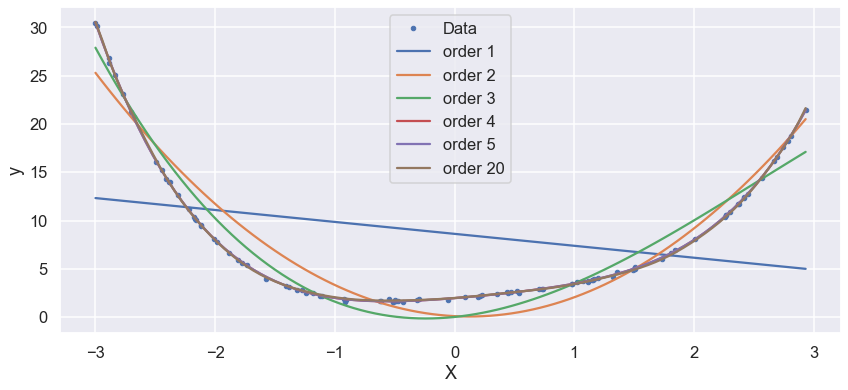

Data set 2
	Order 1:
		MSE_train = 3.999,
		MSE_val = 3.151,
		Coefficients = [2.93 0.4 ]
	Order 2:
		MSE_train = 1.403,
		MSE_val = 1.278,
		Coefficients = [1.05 0.53 0.57]
	Order 3:
		MSE_train = 0.242,
		MSE_val = 0.135,
		Coefficients = [ 0.99  1.95  0.52 -0.25]
	Order 4:
		MSE_train = 0.242,
		MSE_val = 0.138,
		Coefficients = [ 0.97  1.95  0.54 -0.25 -0.  ]
	Order 5:
		MSE_train = 0.242,
		MSE_val = 0.140,
		Coefficients = [ 0.97  1.91  0.55 -0.23 -0.   -0.  ]
	Order 20:
		MSE_train = 0.210,
		MSE_val = 0.222,
		Coefficients = [ 8.19e-01  2.06e+00  2.72e+00 -1.05e+00 -8.34e+00  7.43e-01  1.35e+01
 -8.17e-02 -1.11e+01 -1.68e-01  5.11e+00  9.26e-02 -1.41e+00 -2.20e-02
  2.38e-01  2.73e-03 -2.40e-02 -1.74e-04  1.33e-03  4.45e-06 -3.12e-05]


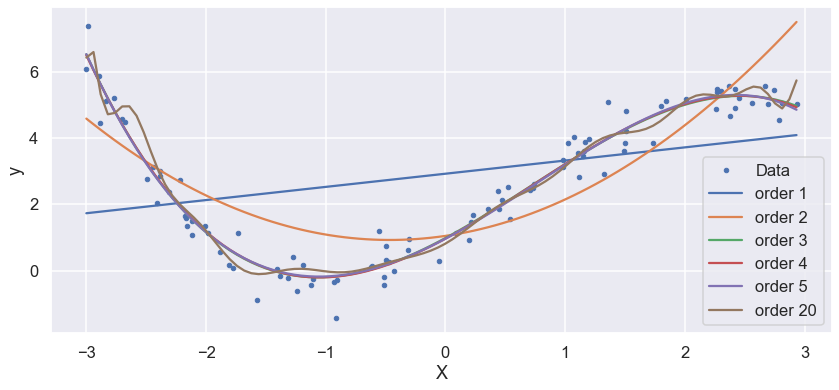

Data set 3
	Order 1:
		MSE_train = 8.237,
		MSE_val = 5.978,
		Coefficients = [3.11 0.28]
	Order 2:
		MSE_train = 4.966,
		MSE_val = 3.890,
		Coefficients = [1.01 0.42 0.64]
	Order 3:
		MSE_train = 3.878,
		MSE_val = 2.160,
		Coefficients = [ 0.95  1.8   0.59 -0.24]
	Order 4:
		MSE_train = 3.874,
		MSE_val = 2.203,
		Coefficients = [ 0.87  1.81  0.67 -0.24 -0.01]
	Order 5:
		MSE_train = 3.868,
		MSE_val = 2.247,
		Coefficients = [ 0.86  1.65  0.7  -0.15 -0.01 -0.01]
	Order 20:
		MSE_train = 3.364,
		MSE_val = 3.575,
		Coefficients = [ 2.40e-01  2.29e+00  9.42e+00 -3.46e+00 -3.34e+01  2.97e+00  5.41e+01
 -3.27e-01 -4.43e+01 -6.70e-01  2.04e+01  3.70e-01 -5.64e+00 -8.80e-02
  9.51e-01  1.09e-02 -9.60e-02 -6.95e-04  5.33e-03  1.78e-05 -1.25e-04]


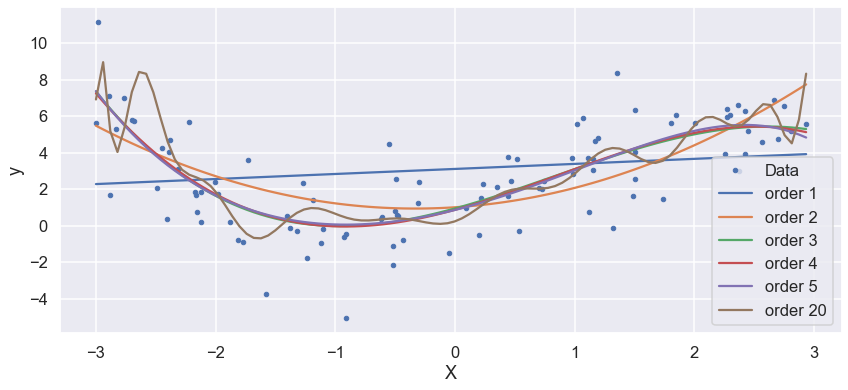

In [20]:
order = [1,2,3,4,5,20] # Orders of polynomial fit
np.set_printoptions(precision=2)
(X_train, X_val, y_train, y_val) = load_data(datafile)
for n in range(1,4):
    fig, ax = plt.subplots(1,1, figsize=(14,6))
    data = load_data(f'DataFiles/dataset{n}.dat')
    print(f'Data set {n}')
    X=np.concatenate((data[0], data[1])) # concatenate train and validation data to use both for plotting
    y=np.concatenate((data[2], data[3]))
    ax.plot(X, y, "b.",label="Data")
    for o in order:
        print(f'\tOrder {o}:')
        MSE_train, MSE_val, theta = polynomial_regression(data, degree=o) #obtain MSE scores and best theta
        plot_fit(X, y, ax, theta)
        print(f'\t\tMSE_train = {MSE_train:.3f},\n\t\tMSE_val = {MSE_val:.3f},\n\t\tCoefficients = {theta}')
    ax.legend(loc='best')
    plt.show()

Use the text cell below to answer the following two questions:
- Which degree polynomial do you think was used when generating the data?
- Which data set do you think has the most noise?

Discuss your reasoning.

* * *
**PLEASE WRITE YOUR ANSWER HERE** 
* * *

Which degree polynomial do you think was used when generating the data?

Data set 1:

Order four since i) order five estimates the coefficient for x^5 to be close to 0 while the previous coefficents are roughly the same as for order four and ii) the validation MSE is (together with order five) minimized for order four and iii) judging by the figure it gives a good fit.

Data set 2:

Order three since i) order four and five estimates the coefficient for x^4 and x^5 to be close to 0 while the previous coefficents are roughly the same as for order three and ii) the validation MSE is minimized for order three and iii) judging by the figure it gives a good fit.

Data set 3:

Order three since i) order four and five estimates the coefficient for x^4 and x^5 to be close to 0 while the previous coefficents are roughly the same as for order three and ii) the validation MSE is minimized for order three and iii) judging by the figure it gives a good fit.

Which data set do you think has the most noise?

Data set 3 since i) The MSE values are the highest and ii) judging by the figure, with the knowledge that the most probable order is 3, the data looks very noisy in comparison with the other data sets. 

## Problem 4
### (3 points)

### Standard medical example by applying Bayesian rules of probability

Suppose there is an unknown disease (call it UD) and there is a test for it.

a. The false positive rate is 2.3%. ("False positive" means the test says you have UD, but you don't.) <br>
b. The false negative rate is 1.4%. ("False negative" means you have UD, but the test says you don't.)

Assume that 1 in 10,000 people have the disease. You are given the test and get a positive result.  Your ultimate goal is to find the probability that you actually have the disease. 
$% Some LaTeX definitions we'll use.
\newcommand{\pr}{\textrm{p}}
$

We'll do it using the Bayesian rules.

We'll use the notation:

* $H$ = "you have UD"
* $\overline H$ = "you do not have UD"  
* $D$ = "you test positive for UD"
* $\overline D$ = "you test negative for UD"  

Use the text cell below to answer the following questions:
<br>
Notation: $H$ = "you have UD", &nbsp;&nbsp; $\overline H$ = "you do not have UD",  &nbsp;&nbsp; $D$ = "you test positive for UD", &nbsp;&nbsp;  $\overline D$ = "you test negative for UD" 

a. *Before doing a calculation (or thinking too hard :), does your intuition tell you the probability you have the disease is high or low?*
<br>

b. *In the $p(\cdot | \cdot)$ notation, what is your ultimate goal?*
<br>

c. *Express the false positive rate in $p(\cdot | \cdot)$ notation.* \[Ask yourself first: what is to the left of the bar?\]
<br>

d. *Express the false negative rate in $p(\cdot | \cdot)$ notation. By applying the sum rule, what do you also know? (If you get stuck answering the question, do the next part first.)* 
<br>

e. *Should $p(D|H) + p(D|\overline H) = 1$?
    Should $p(D|H) + p(\overline D |H) = 1$?
    (Hint: does the sum rule apply on the left or right of the $|$?)*
<br>

f. *Apply Bayes' theorem to your result for your ultimate goal (don't put in numbers yet).
   What other probabilities do we need?*
<br>

* * *
**PLEASE WRITE YOUR ANSWER HERE** 
* * *
a) Intuition tells me that the probability of having it is low even though I'd test positive for it since a priori we know that 1/10000 have it and a glance at the false positive rate of 2.3% we see that it is roughly 2 orders of magnitude larger than the 1/10000 of having it without this information. Therefore a rough guess would be that our true positive rate will be a bit less than 1/100.

b) Find $p(H|D)$

c) $p(\bar{H}|D)$

d) $p(H|\bar{D})$. We also have that $p(H|\bar{D})=1-p(\bar{H}|D)$

e) By the normalization condition $p(D|H)+p(\bar{D}|H)=1$. That is, the probability of testing positive or negative (all possible outcomes) for UD should add up to 1 no matter what you condition on. However $p(D|H) + p(D|\bar{H})\neq1$ since the probability of testing positive for UD is only one of the two possible outcomes for the test result.

f) So for our final probability we use Bayes theorem $p(H|D)=\frac{p(D|H)p(H)}{p(D)}$ with $p(D|H)=1-p(\bar{D}|H)=(1-1\cdot0.014)/1=0.986$, $p(H)=1/10000=0.0001$ and $p(D)=p(D|H)\cdot p(H)+p(D|\bar{H})\cdot p(\bar{H})=\frac{1-1\cdot0.014}{1}\cdot0.0001 + \frac{9999\cdot0.023}{9999}\cdot\frac{9999}{10000}=0.0230963$ we obtain $p(H|D)=\frac{0.986 \cdot 0.0001}{0.0230963}\approx0.43\%$ which roughly matches our initial guess.

In [21]:
###### Please fill the probabilities as values for the 
# corresponding keys in the following dictionary.
medical_example_probabilities = {}
medical_example_probabilities['p(D|Hbar)'] = 0.023
medical_example_probabilities['p(Dbar|H)'] = 0.014
medical_example_probabilities['p(D|H)'] = (1-1*0.014)/1
medical_example_probabilities['p(H,Hbar|D)'] = 0
medical_example_probabilities['p(Hbar)'] = 9999/10000
medical_example_probabilities['p(D)'] = ((1-1*0.014) + (9999*0.023))/10000
medical_example_probabilities['p(H|D)'] = 0.986*0.0001/0.0230963  

# 
# YOUR CODE HERE
# 

In [22]:
for key in ['p(D|Hbar)', 'p(Dbar|H)', 'p(D|H)']:
    assert medical_example_probabilities[key] > 0.
    assert medical_example_probabilities[key] < 1.
    
assert medical_example_probabilities['p(H,Hbar|D)'] <= 1.0


In [23]:
for key in ['p(Hbar)', 'p(D)', 'p(H|D)']:
    assert medical_example_probabilities[key] > 0.
    assert medical_example_probabilities[key] < 1.